<a href="https://colab.research.google.com/github/pndang/Project_WHEL/blob/main/predictive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Author: Phu Dang
# Date: 02.14.2023
# Mentor: Professor Niema Moshiri, Niema Lab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [22]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [24]:
# iris['data']

In [25]:
iris = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],
    columns=iris['feature_names'] + ['target']
)

In [27]:
species = []

for i in range(len(iris['target'])):
    if iris['target'][i] == 0:
        species.append("setosa")
    elif iris['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')


iris['species'] = species

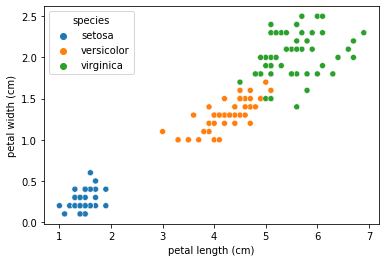

In [29]:
sns.scatterplot(data=iris, x='petal length (cm)', y='petal width (cm)', hue='species')

In [34]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [43]:
X = iris.drop(['target', 'species'], axis=1)

# Converting data into numpy arrays
X = X.to_numpy()[:, (0, 1, 2, 3)]
y = iris['target']

# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5, 
                                                    random_state=42)

In [45]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [46]:
clf.predict([[5, 2.1, 4, 1.4]])

array([2.])

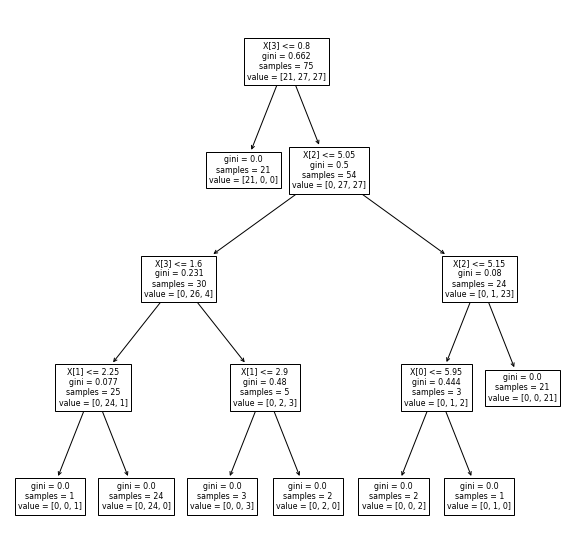

In [47]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf);

In [54]:
# Getting model accuracy

results = []

for array in X_test:
  prediction = clf.predict([array])
  results.append(prediction[0])


In [63]:
y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30,  22,  15,  65,  11,  42, 146,  51,  27,   4,
             32, 142,  85,  86,  16,  10,  81, 133, 137,  75, 109,  96, 105,
             66,   0, 122,  67,  28,  40,  44,  60, 123,  24,  25,  23,  94,
             39,  95, 117,  47,  97, 113,  33, 138, 101,  62],
           dtype='int64')

In [64]:
correct_count = 0
idx = 0
for i in y_test.index:
  if results[idx] == y_test[i]:
    correct_count += 1
  idx += 1

accuracy = correct_count / len(y_test)

In [65]:
accuracy

0.8933333333333333